In [78]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [19]:
digits = datasets.load_digits()

In [20]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

In [22]:
X = digits.data
y= digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
digits.data.shape

(1797, 64)

In [25]:
digits.target.shape

(1797,)

## 1. k-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [48]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 


In [50]:
 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
   

In [53]:
print(train_accuracy)
print(test_accuracy)

[1.         0.99095338 0.99234516 0.99025748 0.99164927 0.98886569
 0.9881698  0.9881698 ]
[0.98611111 0.98611111 0.98888889 0.98888889 0.98333333 0.97777778
 0.98333333 0.98611111]


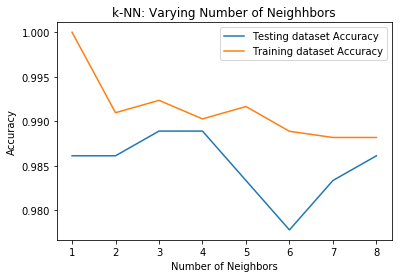

In [41]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend()
plt.title('k-NN: Varying Number of Neighhbors')
plt.xlabel('Number of Neighbors') 
plt.ylabel('Accuracy') 
plt.show()

In [81]:
knn_acc = KNeighborsClassifier()
knn_acc.fit(X_train, y_train)  
y_pred_knn = knn_acc.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.9833333333333333

## 2. Support Vector Machine

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [63]:
SVC_linear = SVC(kernel='linear')
SVC_linear.fit(X_train, y_train)
y_linear_pred = SVC_linear.predict(X_test)
print(classification_report(y_test, y_linear_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        35
          1       0.95      1.00      0.98        42
          2       1.00      1.00      1.00        42
          3       1.00      0.97      0.99        36
          4       0.97      1.00      0.99        37
          5       0.95      0.95      0.95        38
          6       0.94      0.97      0.96        34
          7       1.00      1.00      1.00        42
          8       1.00      0.92      0.96        25
          9       0.93      0.93      0.93        29

avg / total       0.98      0.97      0.97       360



In [64]:
SVC_linear = SVC(kernel='rbf')
SVC_linear.fit(X_train, y_train)
y_rbf_pred = SVC_linear.predict(X_test)
print(classification_report(y_test, y_rbf_pred))

             precision    recall  f1-score   support

          0       1.00      0.57      0.73        35
          1       1.00      0.55      0.71        42
          2       1.00      0.21      0.35        42
          3       1.00      0.50      0.67        36
          4       1.00      0.41      0.58        37
          5       1.00      0.16      0.27        38
          6       1.00      0.71      0.83        34
          7       1.00      0.17      0.29        42
          8       0.12      1.00      0.21        25
          9       1.00      0.79      0.88        29

avg / total       0.94      0.47      0.55       360



In [65]:
SVC_linear = SVC(kernel='poly')
SVC_linear.fit(X_train, y_train)
y_poly_pred = SVC_linear.predict(X_test)
print(classification_report(y_test, y_poly_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        35
          1       0.95      1.00      0.98        42
          2       1.00      1.00      1.00        42
          3       1.00      1.00      1.00        36
          4       0.97      1.00      0.99        37
          5       0.97      0.95      0.96        38
          6       0.94      0.97      0.96        34
          7       1.00      1.00      1.00        42
          8       0.96      0.92      0.94        25
          9       0.96      0.93      0.95        29

avg / total       0.98      0.98      0.98       360



In [83]:
acc_SVM = accuracy_score(y_test, y_poly_pred)
acc_SVM

0.9777777777777777

## 3. Naive Bayes


In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [89]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_Bayes = accuracy_score(y_test, y_pred)
acc_Bayes

0.825

In [72]:
com = confusion_matrix(y_test, y_pred)
com

array([[34,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  3,  3],
       [ 0,  3, 20,  1,  0,  0,  0,  0, 18,  0],
       [ 0,  1,  0, 26,  0,  1,  0,  2,  5,  1],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 35,  1,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 40,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  1, 20,  0],
       [ 0,  1,  0,  1,  0,  1,  1,  2,  5, 18]], dtype=int64)

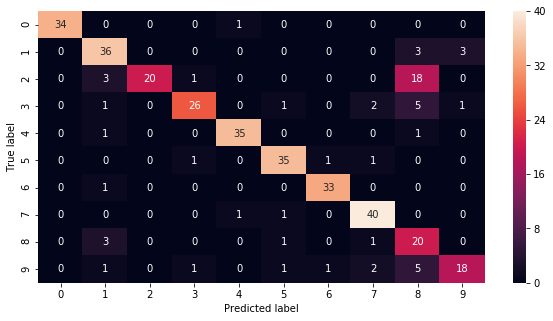

In [75]:
plt.figure(figsize=(10, 5))
sns.heatmap(com, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

([<matplotlib.axis.XTick at 0x1dda9986710>,
 <a list of 3 Text xticklabel objects>)

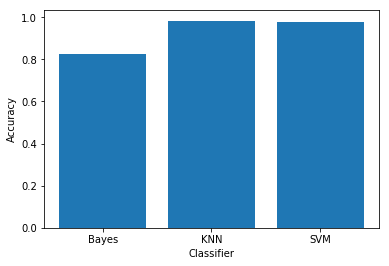

In [93]:
bayes_acc = accuracy_score(y_test, y_pred)
classifier = ['Bayes', 'KNN', 'SVM']
Accuracy = [acc_Bayes, acc_knn, acc_SVM]
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
x = np.arange(3)
plt.bar(x, height= Accuracy)
plt.xticks(x, classifier)

# II. Regression

## 1. Linear Regression

In [96]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [97]:
corr = df.corr()

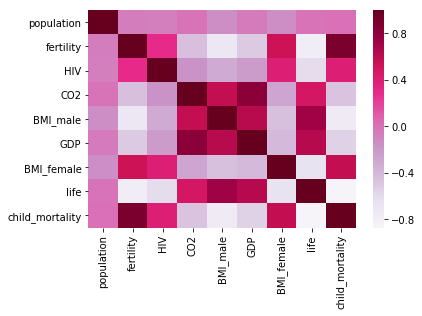

In [101]:
sns.heatmap(corr, cmap ="PuRd")

In [102]:
from sklearn.linear_model import LinearRegression

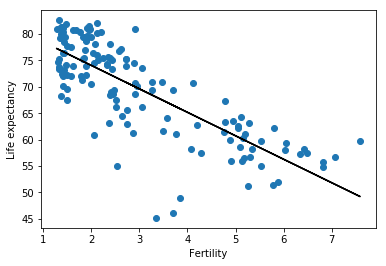

In [115]:
lr = LinearRegression()
X = df['fertility'].values.reshape(-1, 1) 
y = df['life'].values.reshape(-1, 1)
y = y.astype('float')
lr.fit(X, y)
y_pred = lr.predict(X)
plt.scatter (X, y)
plt.plot (X, y_pred, color = 'black')
plt.xlabel('Fertility')
plt.ylabel('Life expectancy')
plt.show()

In [119]:
features = list(df.columns)
features.pop(7)
features = features[:-1]
features

['population',
 'fertility',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'child_mortality']

In [129]:
X_alf = df[features]
lr.fit(X_alf,y)
y_pred_alf = lr.predict(X_alf)
y_alf = df['life']

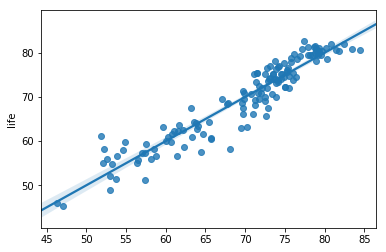

In [130]:
sn.regplot(y_pred_alf, y_alf)

In [123]:
from sklearn.model_selection import cross_val_score

In [134]:
score_ferility = cross_val_score(lr, X, y, cv=3) 
score_ferility

array([0.75397745, 0.55557583, 0.57886144])

In [135]:
score_allfeatures =cross_val_score(lr, X_alf, y_alf, cv=3 )
score_allfeatures

array([0.83699524, 0.87875694, 0.89986165])